<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/%EC%9B%8C%EB%93%9C%20%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C/%EC%9E%90%EC%97%B0%EC%96%B4_%EC%B2%98%EB%A6%AC_%EB%A7%9B%EB%B3%B4%EA%B8%B0(11_07).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 자연어 처리(11-07)

In [ ]:
! pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 36.0 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and direc

# 영어 자연어 처리 -> 아직 안배워서 그런지 빡셈

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


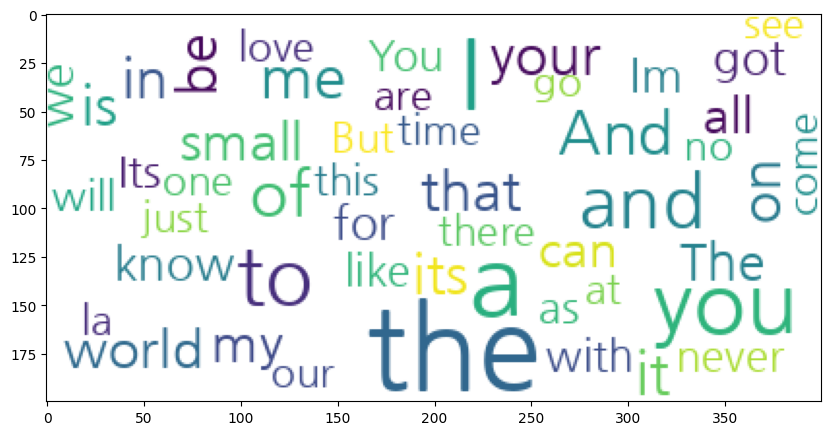

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
import nltk  # 영어는 konl
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from nltk.corpus import stopwords


disney = pd.read_table('/content/drive/MyDrive/AI스쿨 파일/disney.txt')

# 불필요한 심볼 없애기
text_data = disney['text'].str.replace('[!,\.\“\”\n’\'\(\)?]', '', regex=True)
stopwords = set(stopwords.words('english'))   # 불용어

temp_list = [sent_tokenize(text) for text in text_data]
word = []
for sentences in temp_list:
    for sentence in sentences:
        words = word_tokenize(sentence)
        for w in words:
            if w not in stopwords:  # 불용어 제거
                word.extend(words)

counts = collections.Counter(word)
tag = counts.most_common(50)
tag

from wordcloud import WordCloud
wc = WordCloud(font_path='NanumGothic',background_color = 'white', max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tag))
cloud

plt.figure(figsize=(10,8))
plt.imshow(cloud)